In [42]:
import pickle

# load 5_cluster_testdata.pkl
with open('5_cluster_testdata.pkl', 'rb') as f:
    data = pickle.load(f)

# print the data
print(data.head())

                                          experiment  within_cluster_acc  \
0         CIFAR_5_clusters_DAC_invloss_tau_10_seed_3             82.7985   
1              CIFAR_5_clusters_random_cosine_seed_2             82.3255   
2         CIFAR_5_clusters_DAC_invloss_tau_10_seed_2             83.2035   
3              CIFAR_5_clusters_DAC_l2_tau_10_seed_2             83.4130   
4  CIFAR_5_clusters_DAC_cosine_origin_tau_200_seed_3             82.9170   

   between_cluster_acc  cluster_1_acc  cluster_2_acc  cluster_3_acc  \
0             0.007875        82.5000        76.8550        82.1950   
1             0.000000        87.2700        73.0100        78.4150   
2             0.000125        89.3425        76.1125        81.4350   
3             0.000000        89.2200        73.6700        79.0950   
4             0.000000        87.0075        74.6525        79.5125   

   cluster_4_acc  cluster_5_acc  
0        86.9225        85.5200  
1        88.7650        84.1675  
2        88.70

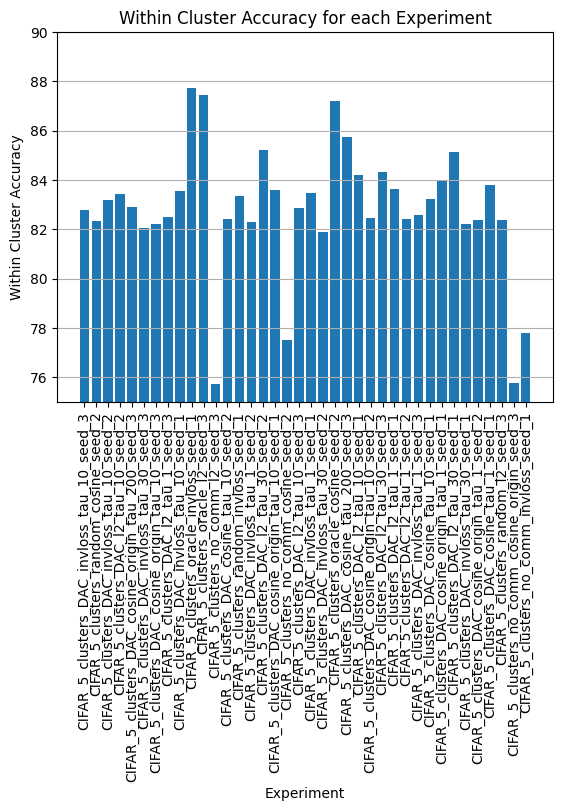

In [43]:
# plot within_cluster_acc for each experiment in a bar plot
import matplotlib.pyplot as plt
plt.bar(data['experiment'], data['within_cluster_acc'])
plt.xlabel('Experiment')
plt.ylabel('Within Cluster Accuracy')
plt.title('Within Cluster Accuracy for each Experiment')

# turn the x-axis labels vertical
plt.xticks(rotation=90)

# grid on y axis
plt.grid(axis='y')

# set y axis limits
plt.ylim(75, 90)
plt.show()

In [44]:
# create new column called 'run_type' which is experiment name but seed_k is removed, where k is any digit
data['run_type'] = data['experiment'].str.replace(r'_seed_3', '')
data['run_type'] = data['run_type'].str.replace(r'_seed_1', '')
data['run_type'] = data['run_type'].str.replace(r'_seed_2', '')
data['run_type'] = data['run_type'].str.replace(r'CIFAR_5_clusters_', '')

# print the data
print(data.head())

                                          experiment  within_cluster_acc  \
0         CIFAR_5_clusters_DAC_invloss_tau_10_seed_3             82.7985   
1              CIFAR_5_clusters_random_cosine_seed_2             82.3255   
2         CIFAR_5_clusters_DAC_invloss_tau_10_seed_2             83.2035   
3              CIFAR_5_clusters_DAC_l2_tau_10_seed_2             83.4130   
4  CIFAR_5_clusters_DAC_cosine_origin_tau_200_seed_3             82.9170   

   between_cluster_acc  cluster_1_acc  cluster_2_acc  cluster_3_acc  \
0             0.007875        82.5000        76.8550        82.1950   
1             0.000000        87.2700        73.0100        78.4150   
2             0.000125        89.3425        76.1125        81.4350   
3             0.000000        89.2200        73.6700        79.0950   
4             0.000000        87.0075        74.6525        79.5125   

   cluster_4_acc  cluster_5_acc                   run_type  
0        86.9225        85.5200         DAC_invloss_tau

In [45]:
# print the number of rows of the df
print(len(data))

# if run_type starts with 'random', set run_type to 'random'
data.loc[data['run_type'].str.startswith('random'), 'run_type'] = 'random'
# same for oracle and no_comm
data.loc[data['run_type'].str.startswith('oracle'), 'run_type'] = 'oracle'
data.loc[data['run_type'].str.startswith('no_comm'), 'run_type'] = 'no_comm'

# get all unique values of run_type
print(data['run_type'].unique())
print(len(data['run_type'].unique()))

38
['DAC_invloss_tau_10' 'random' 'DAC_l2_tau_10' 'DAC_cosine_origin_tau_200'
 'DAC_invloss_tau_30' 'DAC_cosine_origin_tau_10' 'DAC_l2_tau_1' 'oracle'
 'no_comm' 'DAC_cosine_tau_10' 'DAC_invloss_tau_1' 'DAC_l2_tau_30'
 'DAC_cosine_tau_200' 'DAC_cosine_origin_tau_1' 'DAC_cosine_tau_1']
15


In [46]:
# create new df where each row is the average of all rows with the same run_type
#print(data.head())

# Assuming 'data' is your DataFrame
average_df = data.groupby('run_type').agg({
    'within_cluster_acc': ['mean', 'std'],
    'between_cluster_acc': ['mean', 'std'],
    'cluster_1_acc': ['mean', 'std'],
    'cluster_2_acc': ['mean', 'std'],
    'cluster_3_acc': ['mean', 'std'],
    'cluster_4_acc': ['mean', 'std'],
    'cluster_5_acc': ['mean', 'std'],
})

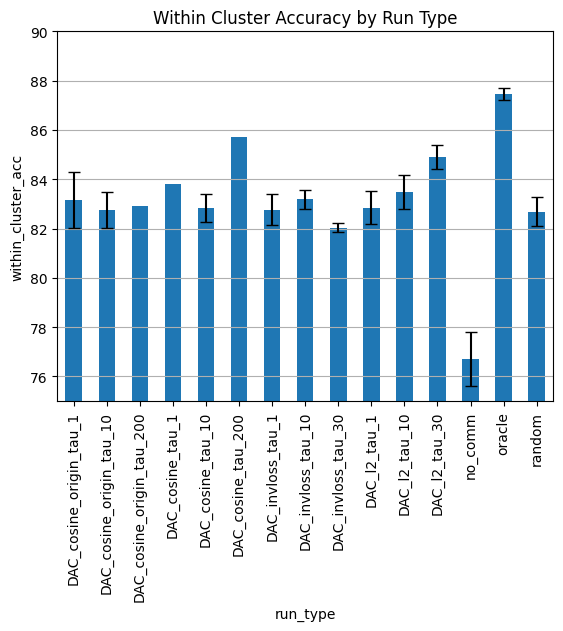

In [47]:
average_df.columns = ['_'.join(col).strip() for col in average_df.columns.values]

import matplotlib.pyplot as plt

# Assuming your DataFrame's column names have been flattened as suggested
means = average_df['within_cluster_acc_mean']
errors = average_df['within_cluster_acc_std']

# Plotting
means.plot(kind='bar', yerr=errors, capsize=4)  # capsize controls the size of the error bar caps
plt.ylabel('within_cluster_acc')
plt.title('Within Cluster Accuracy by Run Type')

# Set y-axis limits
plt.ylim(75, 90)  # Adjust according to your specific data range and needs

# grid on
plt.grid(axis='y')

plt.show()
